In [1]:
import pandas as pd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = (16.0, 8.0)

font_dirs = ["/usr/local/share/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

hfont = matplotlib.font_manager.FontProperties(fname='/usr/local/share/fonts/SourceHanSans-Normal.ttc')
# matplotlib.rcParams['font.family'] = hfont.get_name()
plt.rcParams['font.family'] = hfont.get_name()

#CSV_FILE_PATH = './calcfundfull.csv'
#df = pd.read_csv(CSV_FILE_PATH)

FUNDS_PATH = './funds.xlsx'
dfFunds = pd.read_excel(FUNDS_PATH)

In [2]:
dfFunds[:5]

,code,name,tags,createtime,size,company,managers,values
0,1,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551
1,3,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
2,4,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
3,5,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849
4,6,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377


In [3]:
dfFunds.isnull().sum()

code            0
name            0
tags            0
createtime      0
size          513
company         0
managers        0
values          0
dtype: int64

In [4]:
dfFunds.groupby('company').size().sort_values()

company
--                   1
中银香港资产管理有限公司         1
施罗德投资管理(香港)有限公司      1
浙江浙商证券资产管理有限         1
建银国际资产管理有限公司         1
                  ... 
华夏基金管理有限公司         250
博时基金管理有限公司         261
易方达基金管理有限公司        269
广发基金管理有限公司         286
南方基金管理股份有限公司       298
Length: 154, dtype: int64

Text(0.5, 1.0, '公司')

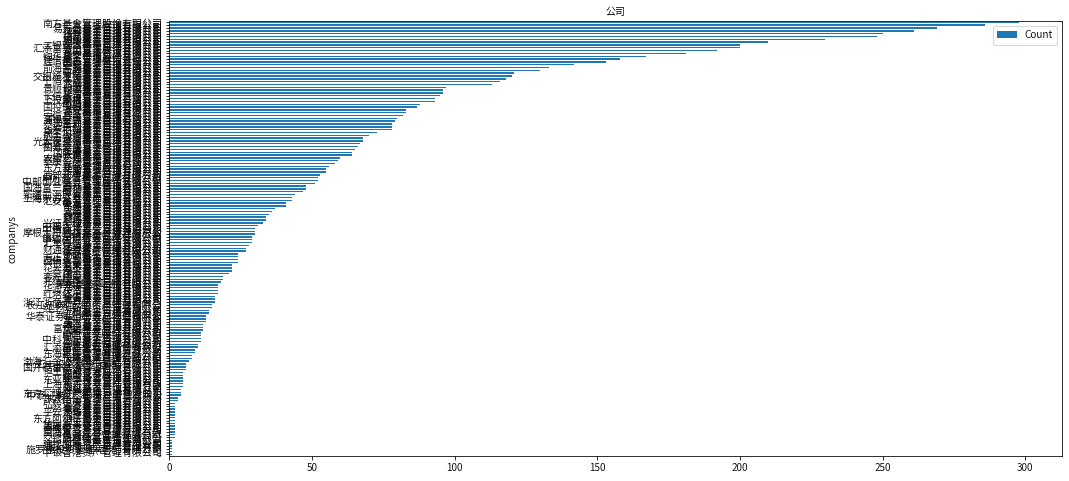

In [5]:
company = dfFunds.groupby('company').size().sort_values().reset_index(name = 'Count')
# legend = plt.legend(prop=hfont)
ax = company.plot(kind = 'barh', x = 'company')
ax.set_xlabel("")
ax.set_ylabel("companys")
ax.set_title("公司", fontsize=20)
# plt.show()